# Linear Regression Assignment : Bike Sharing

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands.
 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:

- To model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


## Step2: Reading Dataset and Understanding Data

In [2]:
# Reading the csv file.

Bike_Sharing_df = pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset.

Bike_Sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Inspect the various aspects.

Bike_Sharing_df.shape

(730, 16)

In [5]:
# Checking Null values

Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking Numerical data

Bike_Sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step3: Cleaning the Data

### Check for NULL/MISSING values


In [7]:
# Checking Missing values precentage amoung columns 

( Bike_Sharing_df.isnull().mean() * 100 ).sort_values( ascending = False )

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**`Observastion:`** No null values present in our data set .


### Droping the columns which are not useful in our analysis.

In [8]:
# Droping instant column which has nothing to do in analysis.

Bike_Sharing_df.drop( ['instant'], axis = 1, inplace = True )

# Dropping dteday because we already have month and weekday columns seperately.

Bike_Sharing_df.drop( ['dteday'], axis = 1, inplace = True )

# Dropping casual and registered columns as we have cnt column which has sum of the both which we call as the target column.

Bike_Sharing_df.drop( ['casual'], axis = 1, inplace = True )

Bike_Sharing_df.drop( ['registered'], axis = 1, inplace = True )

In [9]:
# Checking head again after Droping those columns.

Bike_Sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Checking info after Droping  columns.

Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Analize some columns

In [1]:
# season column

Bike_Sharing_df.season.value_counts()

NameError: name 'Bike_Sharing_df' is not defined

In [12]:
# yr column

Bike_Sharing_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# month column

Bike_Sharing_df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
# weekday column

Bike_Sharing_df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [15]:
# working day column

Bike_Sharing_df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [16]:
# weather column 

Bike_Sharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
# Checking Co-relation

Bike_Sharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


## Step4: EDA & Data Visualising 

### Checking for Outliers for Numerical data



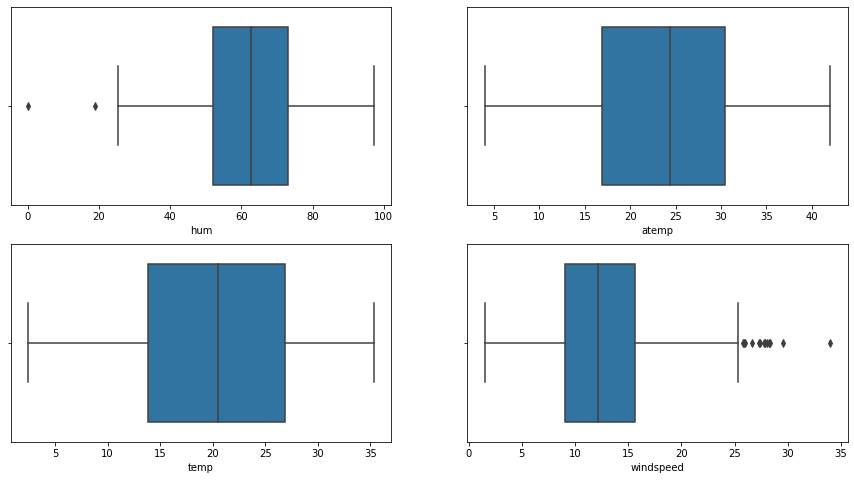

In [18]:
plt.figure( figsize = (15, 8))

plt.subplot(2,2,1)
sns.boxplot(x = 'hum', data = Bike_Sharing_df)

plt.subplot(2,2,2)
sns.boxplot( x ='atemp', data = Bike_Sharing_df)

plt.subplot(2,2,3)
sns.boxplot( x ='temp', data = Bike_Sharing_df)

plt.subplot(2,2,4)
sns.boxplot( x ='windspeed', data = Bike_Sharing_df)

plt.show()

**`Observastion:`** We can see from graph that there are not much  outliers.

### Checking for Outliers for Categorical data


In [2]:
plt.figure( figsize = (25, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing_df)

plt.show()

NameError: name 'plt' is not defined

**`Observastion:`** 
    
      Season: Highest bookings happen in season 3 and has median of around 5000, followed by season 2 and 4,
              so Season can be a helpful for predicting dependent variables .
              
      Mnth  : Highest booking happen in the month of 9 & 10 has median between 4300 and 4500 for both month 
        
       
     we can clearly see because of 0's and 1's and 0-6 so first-of-all we need to convert that numerical 
    values to categorical for better understanding .
    

### Converting Numerical values to Categorical values

In [20]:
# Converting Numerical values for columns ( season , weathersit , mnth , weekday)

# - season : season (1:spring, 2:summer, 3:fall, 4:winter)

Bike_Sharing_df.season.replace( {1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True )


# weathersit : 
# 1: good - Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: moderate - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: bad - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: very bad - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Bike_Sharing_df.weathersit.replace( {1:'good', 2:'moderate', 3:'bad', 4:'very bad'}, inplace = True )

# months :

Bike_Sharing_df.mnth.replace( {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                               7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace = True )

# weekdays :

Bike_Sharing_df.weekday.replace({0: 'sunday', 1: 'monday', 2: 'tues', 3: 'wed', 4: 'thur',
                                 5: 'friday', 6: 'sat'}, inplace = True)


In [21]:
# Lets check head of data after converting this values

Bike_Sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Linear Relationship

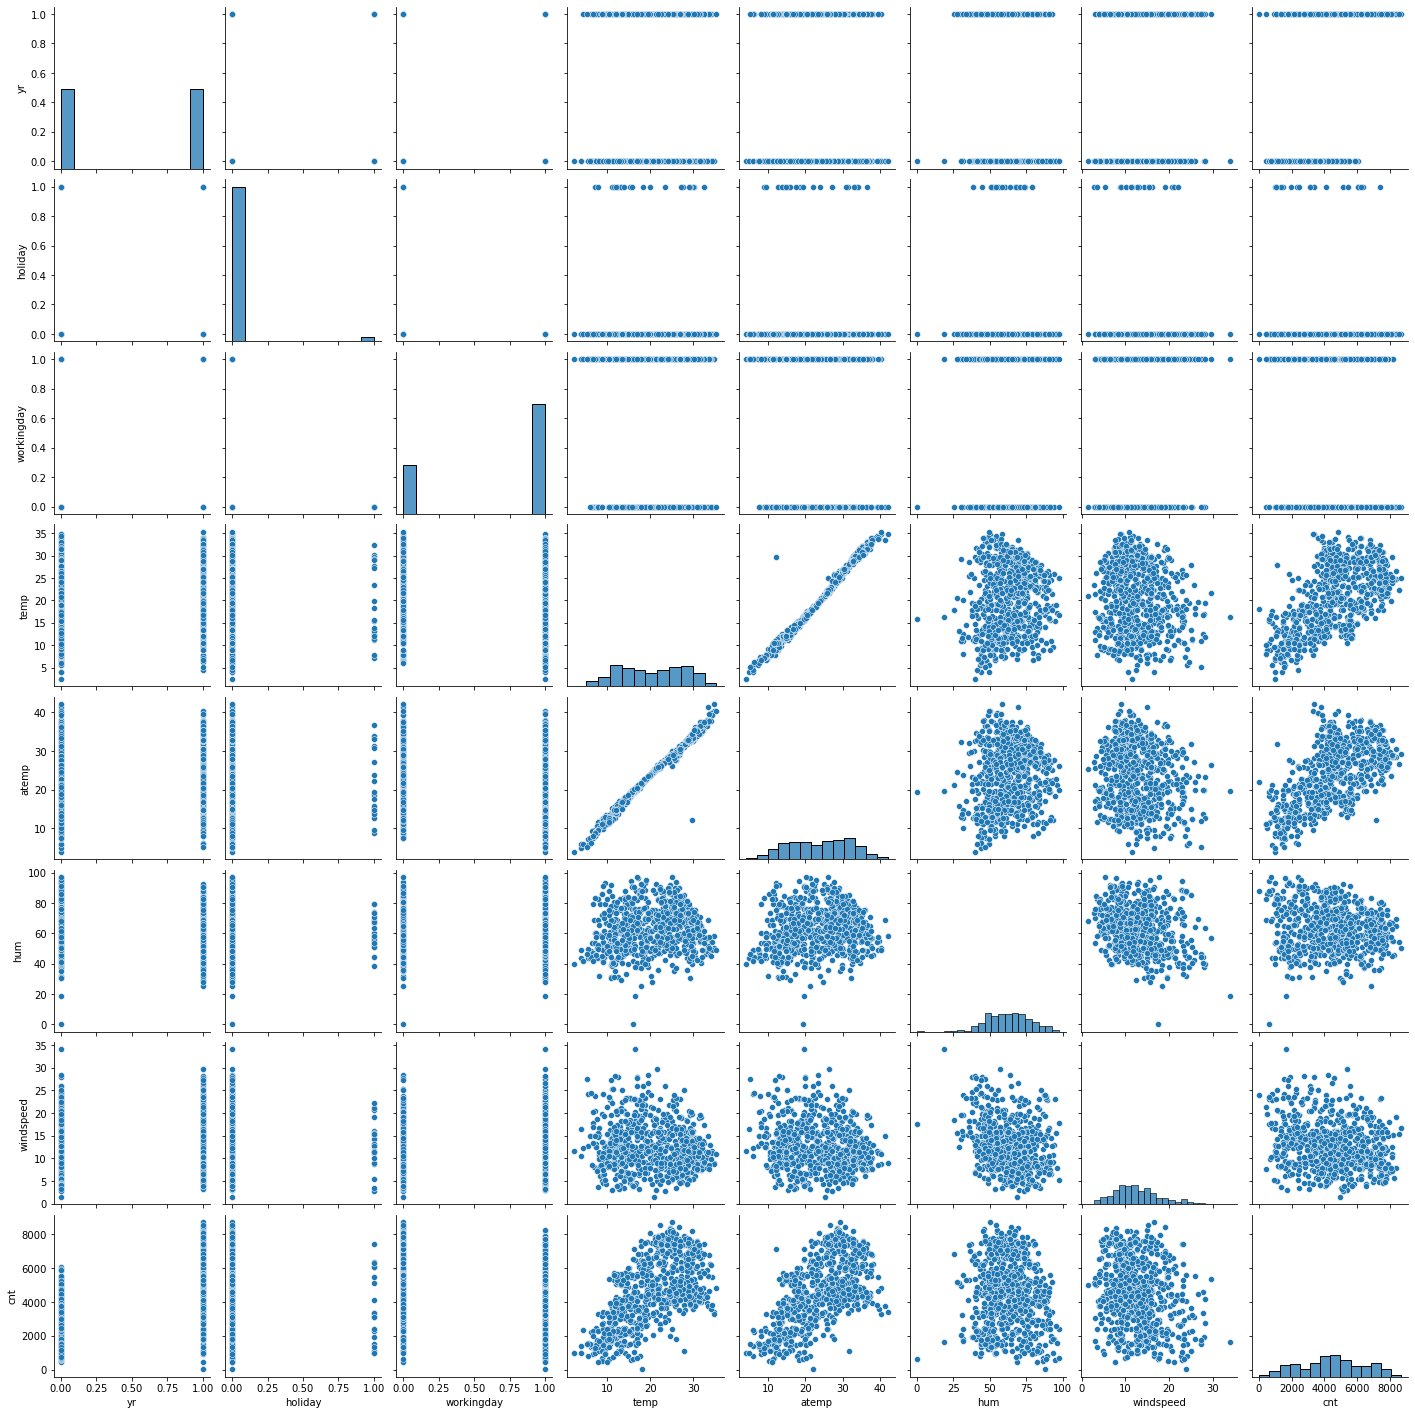

In [22]:
# Lets check correlation matrix across all variables .

sns.pairplot(Bike_Sharing_df)

plt.show()

<Figure size 1080x2160 with 0 Axes>

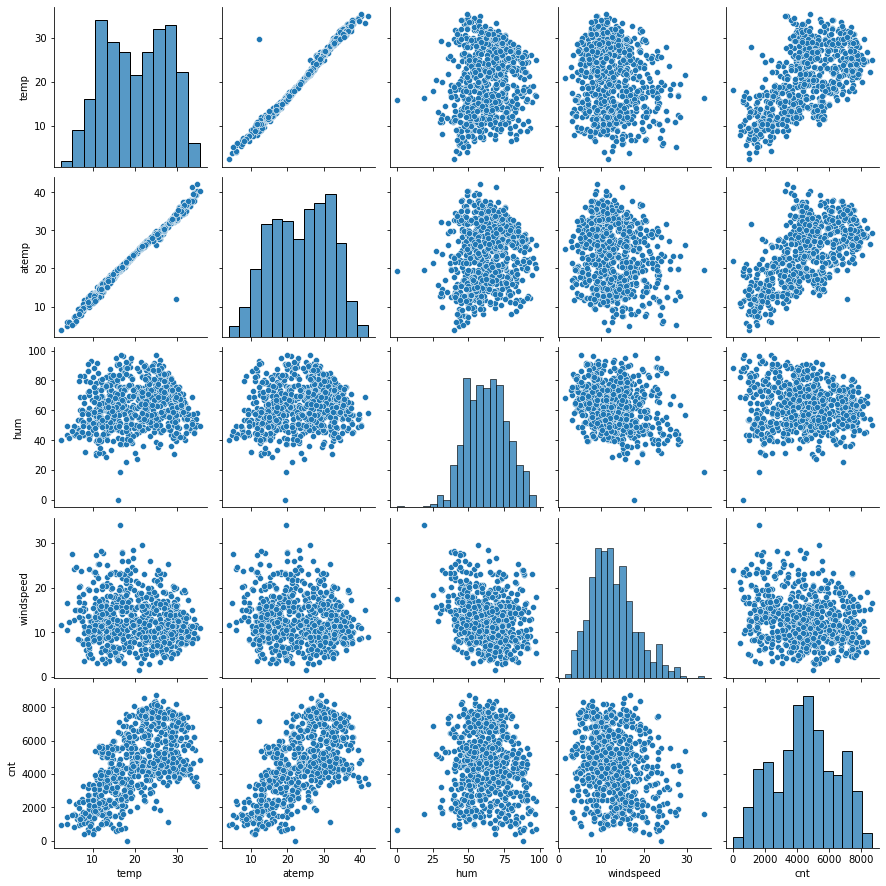

In [23]:
# Lets also check correlation matrix across for numeric  variables .
# making new dataframe called vars for continous varibales i.e = temp, atemp, hum, windspeed, cnt .

plt.figure(figsize = (15, 30))
sns.pairplot( data = Bike_Sharing_df, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] )
plt.show()

**`Observastion:`** Looks like temp & atemp have good relationship with target varibale "cnt" , 
                    also both having high corelation between each other

### Lets plot distplots for some variables

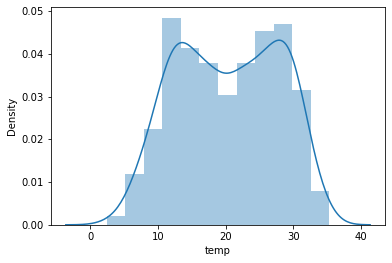

In [24]:
# Temperature

sns.distplot(Bike_Sharing_df['temp'])
plt.show()

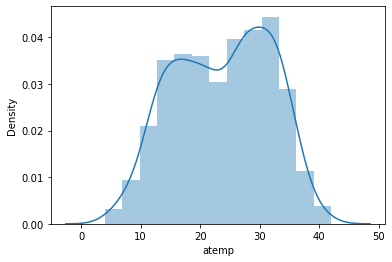

In [25]:
# feeling Temperature

sns.distplot(Bike_Sharing_df['atemp'])
plt.show()

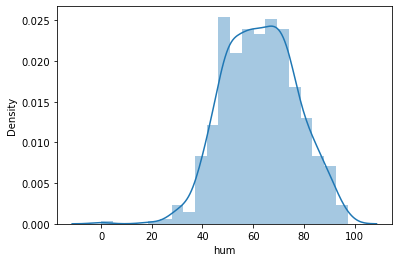

In [26]:
# Humidity

sns.distplot(Bike_Sharing_df['hum'])
plt.show()

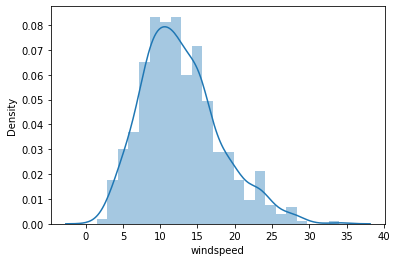

In [27]:
# Wind Speed

sns.distplot(Bike_Sharing_df['windspeed'])
plt.show()

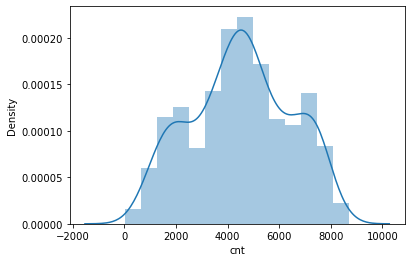

In [28]:
# cnt: count of total rental bikes including both casual and registered

sns.distplot(Bike_Sharing_df['cnt'])
plt.show()

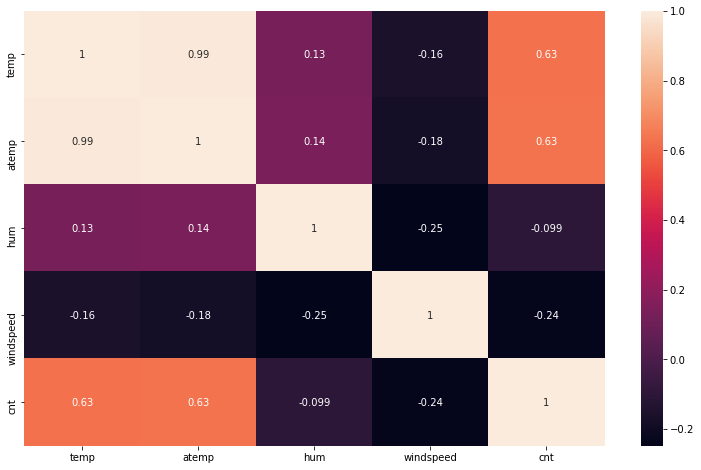

In [29]:
# Checking relationship continuous variables with each other.

plt.figure(figsize = (13,8))
sns.heatmap(Bike_Sharing_df[ [ 'temp', 'atemp', 'hum', 'windspeed', 'cnt' ] ].corr(), annot = True)
plt.show()

**`Observastion:`** We can see only temp and atemp are coorelated each other

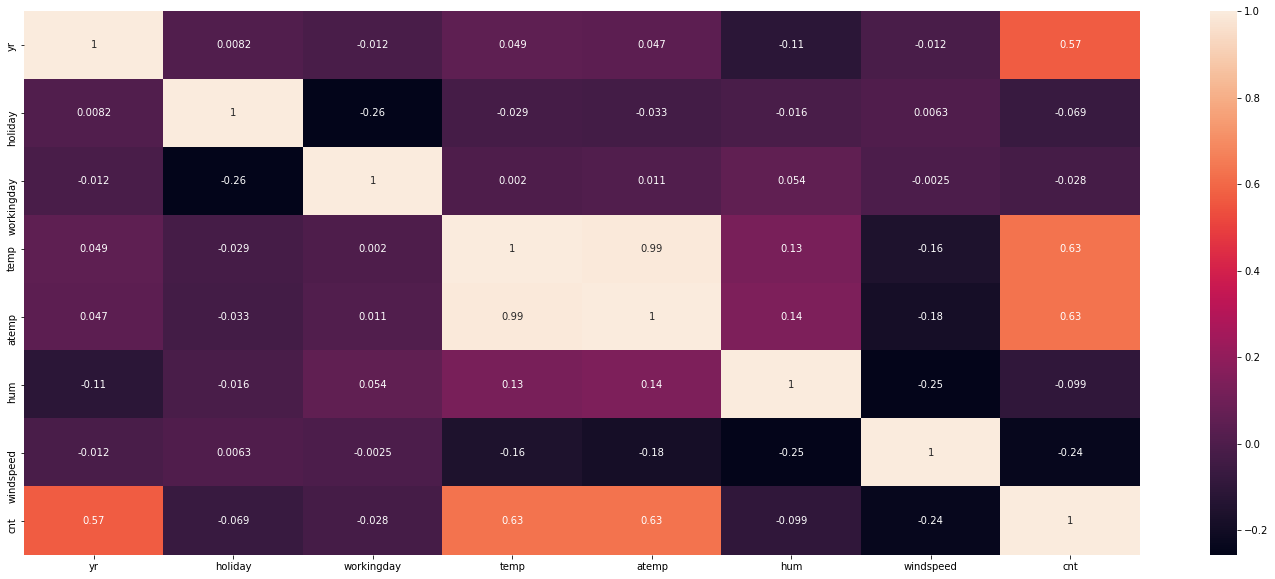

In [30]:
# Heatmap of correlation

plt.figure(figsize = (25,10))
sns.heatmap(Bike_Sharing_df.corr(), annot=True)
plt.show()

**`Observastion:`**  As mention earlier we can see cnt has high coorelation with temp and atemp

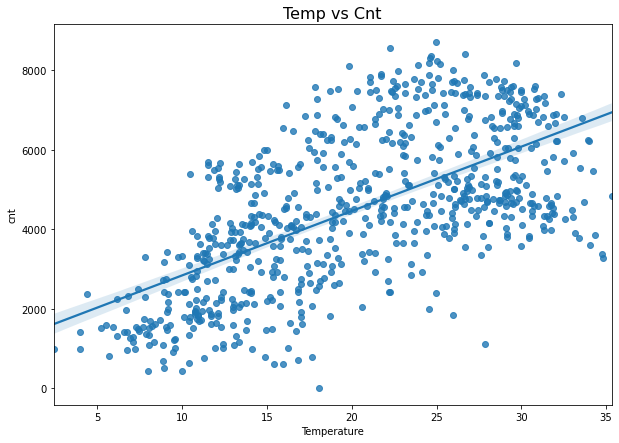

In [31]:
# Checking coorelation between temp & cnt

plt.figure( figsize = (10,7))
plt.title( "Temp vs Cnt", fontsize = 16 )
sns.regplot( x = "temp",  y = "cnt", data = Bike_Sharing_df )
plt.xlabel("Temperature")
plt.show()

**`Observastion:`**  We can see demand increase with increase in  temperature.

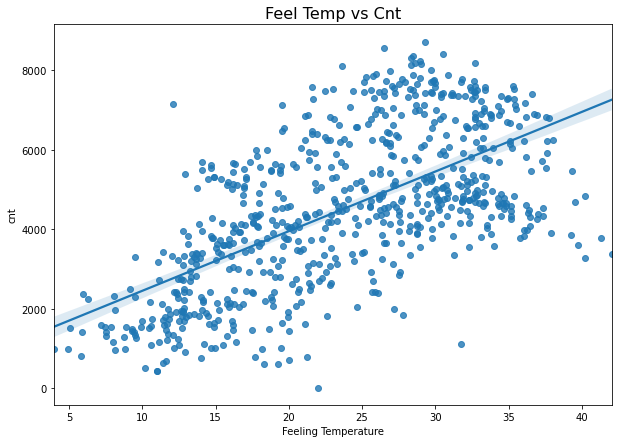

In [32]:
# Checking coorelation between atemp & cnt

plt.figure(figsize = (10,7))
plt.title( "Feel Temp vs Cnt", fontsize = 16)
sns.regplot( x = "atemp", y = "cnt", data = Bike_Sharing_df)
plt.xlabel("Feeling Temperature")
plt.show()

**`Observastion:`**  Same the demand of bike is increase as increase in temperature 

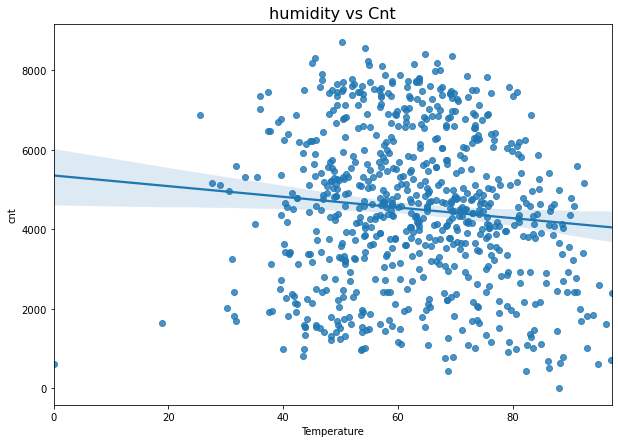

In [33]:
# Checking coorelation between humidity & cnt

plt.figure(figsize = (10,7))
plt.title( "humidity vs Cnt", fontsize = 16)
sns.regplot( x = "hum",  y = "cnt", data = Bike_Sharing_df)
plt.xlabel("Temperature")
plt.show()

**`Observastion:`**  We can see there is decrease in demand as increasing in humidity.

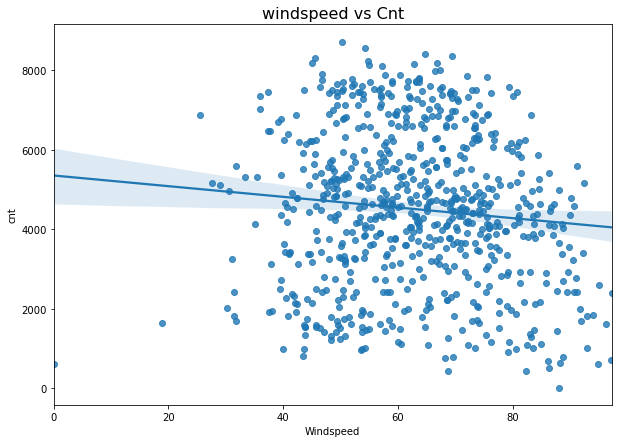

In [34]:
# Checking coorelation between Windspeed & cnt

plt.figure(figsize = (10,7))
plt.title( "windspeed vs Cnt", fontsize = 16)
sns.regplot( x = "hum",  y = "cnt", data = Bike_Sharing_df)
plt.xlabel("Windspeed")
plt.show()

**`Observastion:`**  We can see demand is decreasing as increasing in Windspeed .

In [35]:
# Checking head 

Bike_Sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Step5: Data Preparation


In [36]:
# Converting dummies. 

# we dont want to drop first column for weathersit so we are creating after droping other .

Bike_Sharing_df = pd.get_dummies( data = Bike_Sharing_df, columns = [ "season", "mnth", "weekday" , "workingday" , "holiday"], drop_first=True)

Bike_Sharing_df = pd.get_dummies( data = Bike_Sharing_df, columns = ["weathersit"] )

## Step6: Model Building 

### Spliting Data into Training and Test 

In [37]:
# Lets check Columns and rows before building model

Bike_Sharing_df.shape


(730, 31)

In [38]:
# Spliting into Train and Test

df_train, df_test = train_test_split( Bike_Sharing_df, train_size = 0.7, test_size = 0.3, random_state = 400)

In [39]:
# Lets check variables that we created 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 205 to 463
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   temp                 510 non-null    float64
 2   atemp                510 non-null    float64
 3   hum                  510 non-null    float64
 4   windspeed            510 non-null    float64
 5   cnt                  510 non-null    int64  
 6   season_spring        510 non-null    uint8  
 7   season_summer        510 non-null    uint8  
 8   season_winter        510 non-null    uint8  
 9   mnth_aug             510 non-null    uint8  
 10  mnth_dec             510 non-null    uint8  
 11  mnth_feb             510 non-null    uint8  
 12  mnth_jan             510 non-null    uint8  
 13  mnth_jul             510 non-null    uint8  
 14  mnth_jun             510 non-null    uint8  
 15  mnth_mar             510 non-null    u

In [40]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 480 to 442
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   temp                 219 non-null    float64
 2   atemp                219 non-null    float64
 3   hum                  219 non-null    float64
 4   windspeed            219 non-null    float64
 5   cnt                  219 non-null    int64  
 6   season_spring        219 non-null    uint8  
 7   season_summer        219 non-null    uint8  
 8   season_winter        219 non-null    uint8  
 9   mnth_aug             219 non-null    uint8  
 10  mnth_dec             219 non-null    uint8  
 11  mnth_feb             219 non-null    uint8  
 12  mnth_jan             219 non-null    uint8  
 13  mnth_jul             219 non-null    uint8  
 14  mnth_jun             219 non-null    uint8  
 15  mnth_mar             219 non-null    u

In [41]:
# Lets Check train and test's shape and size .

print(df_train.shape)

print(df_test.shape)

(510, 31)
(219, 31)


In [42]:
# Checking the values before scaling.

df_train.head()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_sat,weekday_sunday,weekday_thur,weekday_tues,weekday_wed,workingday_1,holiday_1,weathersit_bad,weathersit_good,weathersit_moderate
205,0,30.476653,36.04790,75.7083,6.084156,3840,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
351,0,9.771653,12.27895,58.6250,11.375193,2431,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
660,1,22.310847,26.51520,64.1667,6.334569,7466,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
265,0,24.975847,26.10625,97.2500,5.250569,2395,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
27,0,8.342598,11.16585,79.3043,8.261100,1167,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Feature Selecting 


In [43]:
# Apply scaler

scaler = MinMaxScaler()


vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Apply fit_transform 

df_train[vars] = scaler.fit_transform(df_train[vars])



In [44]:
# Checking the head

df_train.head()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_sat,weekday_sunday,weekday_thur,weekday_tues,weekday_wed,workingday_1,holiday_1,weathersit_bad,weathersit_good,weathersit_moderate
205,0,0.866039,0.858942,0.700115,0.171091,0.410855,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
351,0,0.226828,0.222814,0.462297,0.368576,0.240542,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
660,1,0.613942,0.603818,0.539443,0.180438,0.849148,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
265,0,0.696217,0.592874,1.000000,0.139978,0.236190,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
27,0,0.182710,0.193024,0.750176,0.252344,0.087755,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [45]:
df_train.describe()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_sat,weekday_sunday,weekday_thur,weekday_tues,weekday_wed,workingday_1,holiday_1,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.560142,0.536332,0.522236,0.412854,0.496619,0.237255,0.258824,0.233333,0.100000,...,0.127451,0.137255,0.147059,0.135294,0.158824,0.709804,0.027451,0.031373,0.643137,0.325490
std,0.500476,0.234067,0.220194,0.194264,0.195516,0.237551,0.425818,0.438419,0.423368,0.300295,...,0.333805,0.344454,0.354512,0.342373,0.365870,0.454298,0.163554,0.174494,0.479544,0.469018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.357625,0.349512,0.370069,0.272165,0.334129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.584407,0.571714,0.519142,0.390337,0.495467,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.761350,0.716403,0.663863,0.529178,0.694458,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


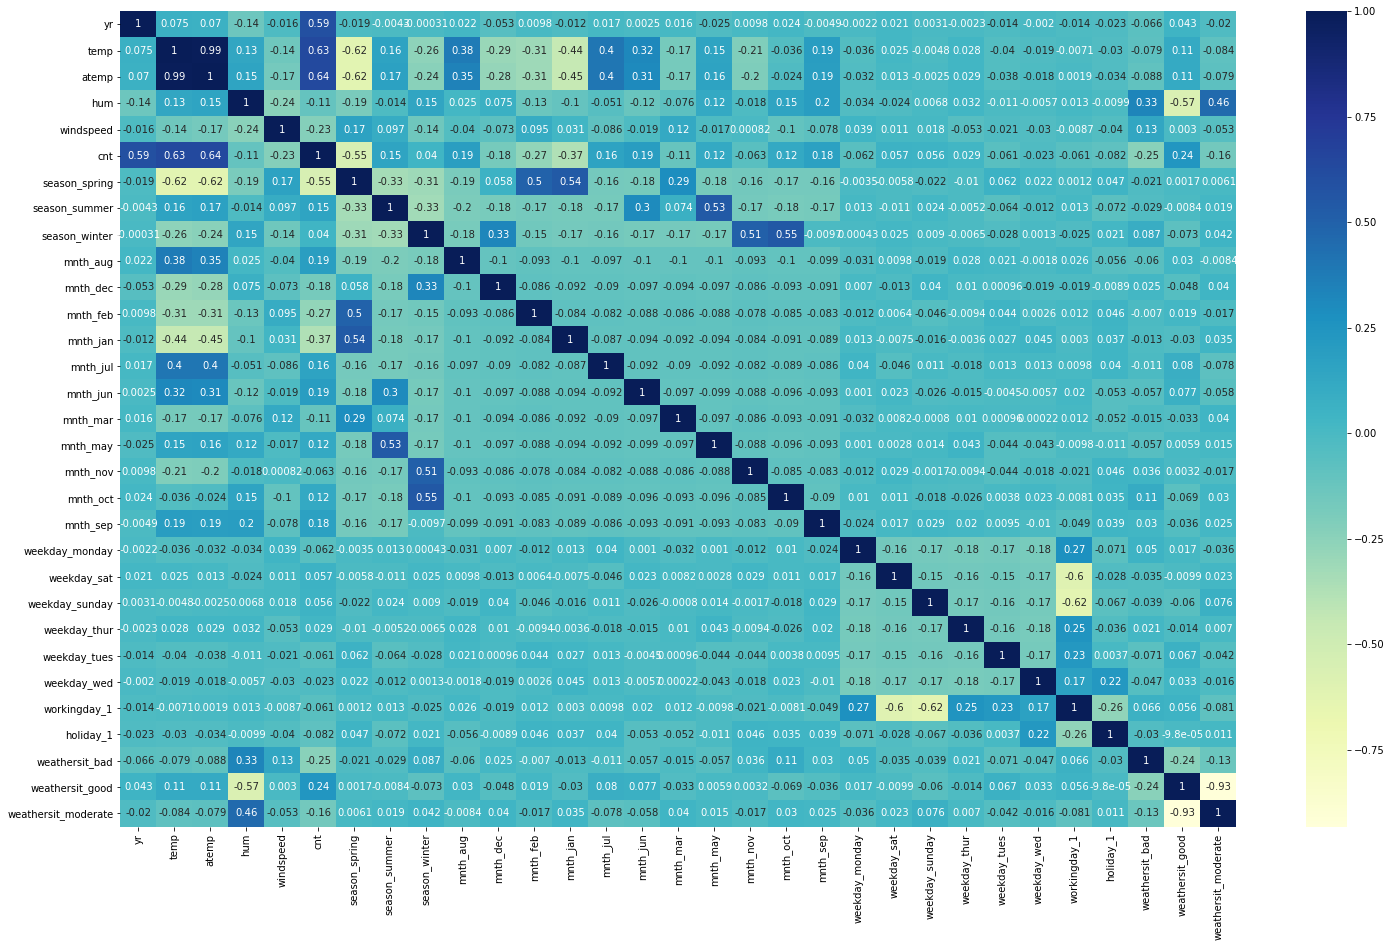

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated among each other

plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu" )
plt.show()

### Dividing Data into X and y sets.

In [47]:
y_train = df_train.pop('cnt')

X_train = df_train

### RFE  

In [48]:
# Adding a constant

X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model

lr = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Checking the parameters.

lr.params

const    0.136196
temp     0.643451
dtype: float64

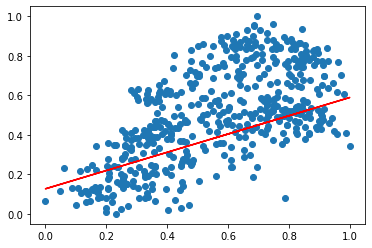

In [50]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [51]:
# Print a summary of the linear regression model obtained

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     341.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.08e-58
Time:                        11:39:18   Log-Likelihood:                 141.00
No. Observations:                 510   AIC:                            -278.0
Df Residuals:                     508   BIC:                            -269.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1362      0.021      6.444      0.0

### Adding another variable

The R-squared value obtained is `0.402`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `atemp`

In [52]:
# Assign all the feature variables to X

X_train_lm = X_train[['temp', 'atemp']]

In [53]:
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.130068
temp     0.258288
atemp    0.413686
dtype: float64

In [54]:
# Checking the summary

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           6.97e-58
Time:                        11:39:18   Log-Likelihood:                 142.29
No. Observations:                 510   AIC:                            -278.6
Df Residuals:                     507   BIC:                            -265.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1301      0.021      6.064      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.402 from 0.405. Let's go ahead and add another variable, hum.

In [55]:
# Assign all the feature variables to X

X_train_lm = X_train[['temp', 'atemp','hum']]

In [56]:
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.242832
temp     0.127984
atemp    0.583585
hum     -0.250647
dtype: float64

In [57]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.74e-64
Time:                        11:39:18   Log-Likelihood:                 160.38
No. Observations:                 510   AIC:                            -312.8
Df Residuals:                     506   BIC:                            -295.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2428      0.028      8.745      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.


### Adding all the variables to the model

In [58]:
# Check all the columns of the dataframe

df_train.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weekday_monday', 'weekday_sat',
       'weekday_sunday', 'weekday_thur', 'weekday_tues', 'weekday_wed',
       'workingday_1', 'holiday_1', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [59]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                  0.296314
yr                     0.247862
temp                   0.291378
atemp                  0.160943
hum                   -0.145923
windspeed             -0.145685
season_spring         -0.083709
season_summer          0.029749
season_winter          0.087391
mnth_aug               0.021116
mnth_dec              -0.029477
mnth_feb              -0.021082
mnth_jan              -0.034035
mnth_jul              -0.018866
mnth_jun               0.014562
mnth_mar               0.026125
mnth_may               0.037441
mnth_nov              -0.045917
mnth_oct               0.048350
mnth_sep               0.088357
weekday_monday        -0.025926
weekday_sat           -0.193871
weekday_sunday        -0.181486
weekday_thur           0.004678
weekday_tues          -0.025445
weekday_wed           -0.009605
workingday_1          -0.208591
holiday_1             -0.266205
weathersit_bad        -0.020001
weathersit_good        0.183340
weathersit_moderate    0.132974
dtype: f

In [60]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     95.74
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.82e-179
Time:                        11:39:18   Log-Likelihood:                 498.13
No. Observations:                 510   AIC:                            -936.3
Df Residuals:                     480   BIC:                            -809.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2963    

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,weathersit_good,453.23
29,weathersit_moderate,230.85
25,workingday_1,118.85
21,weekday_sunday,69.78
1,temp,65.29
20,weekday_sat,63.80
2,atemp,56.01
27,weathersit_bad,23.76
26,holiday_1,14.24
5,season_spring,10.39


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
`weekday_thur` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [62]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('weekday_thur', 1,)

In [63]:
# Building a fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.35
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.93e-180
Time:                        11:39:18   Log-Likelihood:                 498.08
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     481   BIC:                            -815.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2982    

In [65]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,weathersit_good,450.15
28,weathersit_moderate,229.33
24,workingday_1,118.84
21,weekday_sunday,69.40
1,temp,65.28
20,weekday_sat,63.45
2,atemp,56.01
26,weathersit_bad,23.66
25,holiday_1,14.24
5,season_spring,10.39


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `weathersit_bad` has a significantly high VIF (`23.66`) and a high p-value (`0.573`) as well. Hence, this variable isn't of much use and should be dropped.




In [66]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('weathersit_bad', 1)

In [67]:
# Building a fitted model

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.35
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.93e-180
Time:                        11:39:19   Log-Likelihood:                 498.08
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     481   BIC:                            -815.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2786    

In [69]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,436.90
2,atemp,388.76
24,workingday_1,94.36
26,weathersit_good,29.85
21,weekday_sunday,19.12
3,hum,17.96
20,weekday_sat,17.62
5,season_spring,13.37
27,weathersit_moderate,12.78
7,season_winter,11.64


# Dropping the variable and updating the model

As you might have noticed, dropping `weathersit_bad` decreased the VIF of other variables. But from the summary, we can still see some of them have a high p-value. 

In [70]:
X = X.drop('mnth_jul', 1)



In [71]:
# Building a  fitted model

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.27e-181
Time:                        11:39:19   Log-Likelihood:                 497.94
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     482   BIC:                            -821.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2684    

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,419.53
2,atemp,386.31
23,workingday_1,85.57
25,weathersit_good,29.85
3,hum,17.94
20,weekday_sunday,17.26
19,weekday_sat,16.08
26,weathersit_moderate,12.78
5,season_spring,11.55
7,season_winter,11.01


In [74]:
X = X.drop('mnth_feb', 1)


In [75]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.52e-182
Time:                        11:39:19   Log-Likelihood:                 497.81
No. Observations:                 510   AIC:                            -941.6
Df Residuals:                     483   BIC:                            -827.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2594    

In [77]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,412.65
2,atemp,386.30
22,workingday_1,78.07
24,weathersit_good,29.67
3,hum,17.68
19,weekday_sunday,16.03
18,weekday_sat,14.75
25,weathersit_moderate,12.72
7,season_winter,9.84
5,season_spring,7.84


In [78]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth_dec', 1)


In [79]:
# Building  a model

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.69e-183
Time:                        11:39:19   Log-Likelihood:                 497.69
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     484   BIC:                            -833.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2548    

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,407.70
2,atemp,385.90
21,workingday_1,76.29
23,weathersit_good,29.52
3,hum,17.07
18,weekday_sunday,15.66
17,weekday_sat,14.43
24,weathersit_moderate,12.70
5,season_spring,7.81
7,season_winter,7.24


In [82]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth_jan', 1)


In [83]:
# Building a model

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.13e-184
Time:                        11:39:20   Log-Likelihood:                 497.48
No. Observations:                 510   AIC:                            -945.0
Df Residuals:                     485   BIC:                            -839.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2505    

In [85]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('weekday_wed', 1)


In [86]:
# Building a model

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.49e-185
Time:                        11:39:20   Log-Likelihood:                 497.06
No. Observations:                 510   AIC:                            -946.1
Df Residuals:                     486   BIC:                            -844.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2439    

In [88]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth_nov', 1)


In [89]:
# Building a model

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.70e-186
Time:                        11:39:20   Log-Likelihood:                 496.71
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     487   BIC:                            -850.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2495    

In [91]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth_jun', 1)

In [92]:
# Building a  fitted model

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.25e-186
Time:                        11:39:20   Log-Likelihood:                 495.89
No. Observations:                 510   AIC:                            -947.8
Df Residuals:                     488   BIC:                            -854.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2438    

In [94]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,392.49
2,atemp,382.09
17,workingday_1,73.48
19,weathersit_good,28.93
3,hum,16.76
15,weekday_sunday,15.02
14,weekday_sat,13.83
20,weathersit_moderate,12.48
5,season_spring,7.33
4,windspeed,6.56


In [95]:
# Droping high VIF values

X = X.drop('mnth_may', 1)




In [96]:
# Building a  fitted model

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.66e-187
Time:                        11:39:20   Log-Likelihood:                 493.94
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     489   BIC:                            -857.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2284    

In [98]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,391.79
2,atemp,381.93
16,workingday_1,71.42
18,weathersit_good,28.66
3,hum,16.28
14,weekday_sunday,14.63
13,weekday_sat,13.48
19,weathersit_moderate,12.43
5,season_spring,7.25
4,windspeed,6.56


In [99]:
X = X.drop('weekday_monday', 1)


In [100]:
# Building a  fitted model

X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.10e-187
Time:                        11:39:20   Log-Likelihood:                 492.12
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     490   BIC:                            -859.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2231    

In [102]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,391.46
2,atemp,381.85
15,workingday_1,70.37
17,weathersit_good,28.66
3,hum,16.28
13,weekday_sunday,14.61
12,weekday_sat,13.46
18,weathersit_moderate,12.43
5,season_spring,7.23
4,windspeed,6.55


In [103]:
X = X.drop('weathersit_good', 1)



In [104]:
# Building a  fitted model

X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     136.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          7.46e-178
Time:                        11:39:20   Log-Likelihood:                 466.89
No. Observations:                 510   AIC:                            -895.8
Df Residuals:                     491   BIC:                            -815.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4457    

In [106]:
# Building a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [107]:
# Let us build the finalmodel using sklearn

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# Building a model with above columns

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.14819454247118197 [ 0.25511788 -0.12634087 -0.06493517  0.05998336 -0.2771636  -0.07045903
  0.49017437]


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data


In [108]:
# predicting values from data 

y_train_pred = lr.predict(X_train[cols])


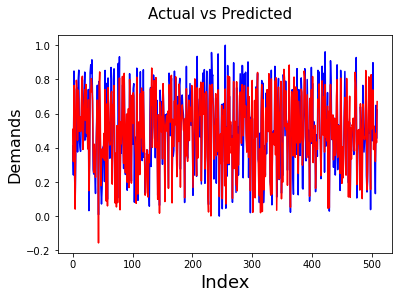

In [109]:
# Actual vs Predicted graph

c = [i for i in range(0,len(X_train),1) ]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18 )
plt.ylabel('Demands', fontsize=16 )
plt.show() 

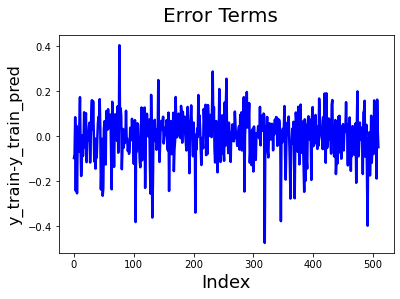

In [110]:
# Error terms graph 

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5)
plt.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                    
plt.ylabel('y_train-y_train_pred', fontsize=16) 
plt.show()

In [111]:
# Print R-squared Value

r2_score(y_train,y_train_pred)

0.813972042486206

## Step 7: Making Predictions

In [112]:
# data before scaling

Bike_Sharing_df.head()



,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_sat,weekday_sunday,weekday_thur,weekday_tues,weekday_wed,workingday_1,holiday_1,weathersit_bad,weathersit_good,weathersit_moderate
0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [113]:
# Final columns which are useful for predicting model well .

cols = ['yr', 'windspeed', 'season_spring'
        , 'mnth_sep', 'mnth_nov', 'mnth_dec', 'weekday_sunday', 'weathersit_bad', 'weathersit_moderate']


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          9.68e-157
Time:                        11:39:21   Log-Likelihood:                 392.67
No. Observations:                 510   AIC:                            -765.3
Df Residuals:                     500   BIC:                            -723.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5423    

## Analysing The  Model

 - Company would be profitable in the season of Spring .
 - Also they would be profitable in the month of July. 
 - As compare to 2019 , ther will be growth once all things got cleared.
 - Yes we can predict that they got less booking in Rainy season. 

** `Other Predicting variables are as follows`**


 - 1) Temp
 - 2) Windspeed
 - 3) Holiday
 - 4) Seasons ( Spring )
 - 5) Months ( September, November, December )
 - 6) Day ( Sunday )
 - 7) Weather ( Bad, Moderate )
